Scientific question being answered: Is the mosquito species Anopheles gambiae genetically more similar to Anopheles darlingi than it is to Anopheles arabiensis due to similarities in climate even though the primary region in which An. gambiae is found is geographically closer to that in which An. arabiensis is primarily found?

I chose these species of mosquito because of the climate and georgraphic locations of the regions in which they are primarily found. Based on the species distribution map that can be found here: https://www.intechopen.com/books/anopheles-mosquitoes-new-insights-into-malaria-vectors/global-distribution-of-the-dominant-vector-species-of-malaria, and research into the climates of various regions An. darlingi is found in a region of South America that has a climate very similar to some regions in Africa in which An. gambiae but not An. arabiensis is found. Whereas the regions of Africa in which only An. arabiensis is found generally have climates that are not as similar to the regions of South America in which An. darlingi is found. Thus, I wanted to test whether climate has a larger impact on the mosquito genomes of different species than does geographic proximity of the species.

I obtained the sequence data for the mosquitoes from the NCBI genome database which then led me to their gene section of the database. I originally tried to compare via sequence alignments the whole genome but my computer could not handle this. I instead compared the mitochondrial DNA sequence I obtained from the NCBI database, and since this was still fairly large sequence data to work with I compared just the cytochrome C oxidase gene portion of the mitochondrial DNA since this was a gene I was able to find sequence information on for all three species. 

Sequence data links:
Darlingi: https://www.ncbi.nlm.nih.gov/gene/9385152
Gambiae: https://www.ncbi.nlm.nih.gov/gene/?term=anopheles+Gambiae+cox2
Arabiensis: https://www.ncbi.nlm.nih.gov/gene/26121207

From these NCBI pages I first downloaded the entire mitochondrial DNA sequence as a Fasta file, and then I selected just the portions of the sequence corresponding to the COX2 gene and downloaded these sequences also as Fasta files. 

If the climate in the regions where two different mosquito species are found are similar, then these mosquito species will be genetically more similar to each other than to another species found in a different climate. Thus, I hypothesize an. gambiae will have a higher similarity score to an. darlingi than it will to an. arabiensis. 

In [75]:
# The NumPy library provides useful tools for working with large, multi-dimensional arrays and matrices.
# NumPy also contains many functions to allow for high-level mathematical analysis of datasets.
import numpy

# pyplot is a module within matplotlib that is designed to provide a MATLAB-like interface for plotting data.
import matplotlib.pyplot as plt

# Bio imports biopython, which contains a huge variety of tools designed to help with analysis of biological data
# such as DNA sequence data. 
import Bio

# Seq is an object within biopythin that allows you to combine a python string with biological methods. 
# Seq contains methods for working with DNA, RNA, or amino acid sequences.
from Bio.Seq import Seq

# The Bio.pairwise 2 module provides a tool form performing pairwise sequence alignments in python. 
from Bio.pairwise2 import format_alignment

# pairwise2 is from biopython and allows you to perform pairwise sequence alignments.
from Bio import pairwise2

# SeqIO provides a concenient interface for inputting and outputting sequence files.
# This package will only deal with sequences in the form of SeqRecord objects.
from Bio import SeqIO

The bioinformatics method I am using is pairwise sequence alignment using the pairwise2.align.globalxx() from biopython. This takes two sequences in the form of strings and then finds the best alignment for the two sequences. The output is the alignment as well as a score for the sequence similarity based on the alignment. By default, the score_only argument is set to False, but for my project I only need the score and not a printout of the alignment so I have set this to True. The sequence alignment method works by maximizing the alignment score according to a set scoring system that assigns a set value to the occurence of a match, a mismatch, and a gap when aligning the two sequences. Because I used globalxx in this case, the scoring is such that identical characters have a score of 1, otherwise 0, and there are no gap penalties (source: https://biopython.org/docs/1.75/api/Bio.pairwise2.html). 

In [76]:
# Opening the fasta file for an. darlingi mitochondiral DNA sequence.
# I had to switch from analyzing the whole genome to just the mitochondrial DNA because my computer couldn't handle the size of the files. 
darli_file = open("darlingi_mito_seq.fasta")
#Reading the contents of the fasta file into darli_seq
darli_seq = darli_file.read()

#Opening the fasta file for an. arabiensis mitochondiral DNA sequence 
arabi_file = open("arabiensis_mito_seq.fasta")
#Reading the contents of the fasta file into arabi_seq
arabi_seq = arabi_file.read()

#Opening the fasta file for an. gambiae mitochondiral DNA sequence 
gambi_file = open("gambiae_mito_seq.fasta")
#Reading the contents of the fasta file into gambi_seq
gambi_seq = gambi_file.read()

#Printing the lengths of sequences in the three fasta files for comparison
print(len(darli_seq))
print(len(arabi_seq))
print(len(gambi_seq))

#Checking the types, I expect them to be of class str
print(type(gambi_seq))
print(type(darli_seq))
print(type(arabi_seq))

15617
15602
15593
<class 'str'>
<class 'str'>
<class 'str'>


In [77]:
# Pairwise global alignment of an. darlingi and an. arabiensis mitochondrial DNA.
# Using globalxx to look for best allignment. 
# If you want to also see the sequence alignment, remove score_only = True, or set to False (this is the default)
gambi_darli_align = pairwise2.align.globalxx(gambi_seq, darli_seq, score_only = True)
gambi_darli_align

13996.0

In [78]:
# Pairwise global alignment of an. darlingi and an. gambiae mitochondrial DNA.
# Using globalxx to look for best allignment. 
# If you want to also see the sequence alignment, remove score_only = True, or set to False (this is the default)
gambi_arabi_align = pairwise2.align.globalxx(gambi_seq, arabi_seq, score_only = True)
gambi_arabi_align

15393.0

In [79]:
#Opening the fasta file for COX2 gene of an. darlingi mitochondiral DNA sequence 
darli_cox_file = open("darlingi_cox_seq.fasta")
#Reading the contents of the fasta file into darli_cox_seq
darli_cox_seq = darli_cox_file.read()

#Opening the fasta file for COX2 gene of an. arabiensis mitochondiral DNA sequence 
arabi_cox_file = open("arabiensis_cox_seq.fasta")
#Reading the contents of the fasta file into arabi_seq
arabi_cox_seq = arabi_cox_file.read()

#Opening the fasta file for COX2 gene of an. gambiae mitochondiral DNA sequence 
gambi_cox_file = open("gambiae_cox_seq.fasta")
#Reading the contents of the fasta file into gambi_seq
gambi_cox_seq = gambi_cox_file.read()

#Printing the lengths of sequences in the three fasta files for comparison
print(len(darli_cox_seq))
print(len(arabi_cox_seq))
print(len(gambi_cox_seq))

#Checking the types, I expect them to be of class str
print(type(gambi_cox_seq))
print(type(darli_cox_seq))
print(type(arabi_cox_seq))

#Checking the printout of one sequence to check it is as expected
print(darli_cox_seq)

705
707
703
<class 'str'>
<class 'str'>
<class 'str'>
>darlingi
ATGGCAACATGAGCAAATTTAGGGTTACAAGATAGTTCTTCTCCTTTAATAGAACAATTAAACTTTTTTC
ATGATCACACATTATTAATTTTAACTATAATTACAATTTTAGTTGGATATATTATAGGAATATTAATATT
TAATAAATTTACTAATCGATATTTATTACATGGACAAACTATTGAAATTATTTGAACAGTATTACCTGCA
ATTATTTTAATATTTATTGCATTCCCTTCATTACGATTATTATACCTAATAGATGAAATTAATACTCCAT
CAATTACATTAAAGTCAGTAGGACATCAATGATATTGAAGTTATGAATATTCAGATTTTCTAAATTTAGA
ATTTGATTCCTATATAATTCCAACAAATGAATTAGAATTAAGTGGATTTCGATTATTAGATGTTGATAAT
CGAGTAGTCTTACCAATAAATAATCAAATTCGAGTTTTAGTAACAGCTACAGATGTTCTTCATTCTTGAA
CAGTTCCTTCTTTAGGGGTAAAGGTAGATGCAACACCAGGCCGACTAAATCAACTTAATTTTTTAATCAA
TCGACCAGGATTATTTTTTGGTCAATGTTCAGAAATTTGTGGAGCTAATCATAGATTTATACCAATTGTA
ATTGAAAGTATCCCTATAAATTTTTTTATTAAATGAATTACTTCTATAACTAATT



In [80]:
# Aligning just the cytochrome C oxidase 2 coding sequence from NCBI to work with for making a sequence logo.
# If you want to also see the sequence alignment, remove score_only = True, or set to False (this is the default).
gambi_darli_cox_align = pairwise2.align.globalxx(gambi_cox_seq, darli_cox_seq, score_only = True)
gambi_darli_cox_align

632.0

In [81]:
# Aligning just the cytochrome C oxidase 2 coding sequence from NCBI to work with for making a sequence logo.
# If you want to also see the sequence alignment, remove score_only = True, or set to False (this is the default).
gambi_arabi_cox_align = pairwise2.align.globalxx(gambi_cox_seq, arabi_cox_seq, score_only = True)
gambi_arabi_cox_align

699.0

In [83]:
print("Based on alignment of the whole mitochondrial DNA sequence, an. gambiae is more similar to an. darlingi than to an. arabiensis:" , gambi_darli_align > gambi_arabi_align)
print("Based on alignment of the COX2 gene sequence, an. gambiae is more similar to an. darlingi than to an. arabiensis:" ,gambi_darli_cox_align > gambi_arabi_cox_align)

Based on alignment of the whole mitochondrial DNA sequence, an. gambiae is more similar to an. darlingi than to an. arabiensis: False
Based on alignment of the COX2 gene sequence, an. gambiae is more similar to an. darlingi than to an. arabiensis: False


The findings presented above refute my hypothesis since they indicate that an. gambiae is in fact genetically more similar to an. arabiensis than to an. darlingi. Below I have created dot plots depicting the alignments. The firt set of dot plots shows a small section of the COX2 gene since it became very difficult to see what was being show on this plot with large sequences. These plots are useful for if you are interested in a specific short section of the gene since you can just input the correct numbers to select the section of the gene you are interested in from the whole gene. You can see, especially in the second set of dot plots that an. gambiae aligns much better with an. arabiensis than with an. darlingi, since there are significantly fewer gaps in the line shown on the gambiae/darlingi plot than on the gambiae/arabiensis plot.

Section of COX2 comparison gambiae to darlingi:


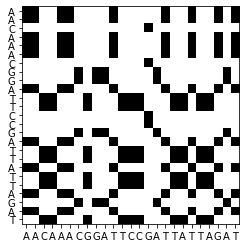

Section of COX2 comparison gambiae to arabiensis:


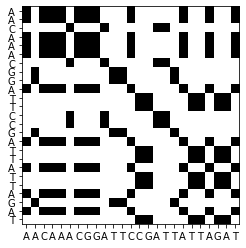

In [84]:
gambi_cox_file = open("gambiae_cox_seq.fasta")
gambi_cox_seq = gambi_cox_file.read()

darli_cox_file = open("darlingi_cox_seq.fasta")
darli_cox_seq = darli_cox_file.read()

arabi_cox_file = open("arabiensis_cox_seq.fasta")
arabi_cox_seq = arabi_cox_file.read()

def delta(x,y):
    return 0 if x == y else 1

def M(seq1,seq2,i,j,k):
    return sum(delta(x,y) for x,y in zip(seq1[i:i+k],seq2[j:j+k]))

def makeMatrix(seq1,seq2,k):
    n = len(seq1)
    m = len(seq2)
    return [[M(seq1,seq2,i,j,k) for j in range(m-k+1)] for i in range(n-k+1)]

def makeDotPlot(seqx, seqy) :
    dotplot=plt.imshow(numpy.array(makeMatrix(seqx,seqy,1)))
    xt=plt.xticks(numpy.arange(len(list(seqx))),list(seqx))
    yt=plt.yticks(numpy.arange(len(list(seqx))),list(seqx))
    plt.show()

print("Section of COX2 comparison gambiae to darlingi:")
makeDotPlot(gambi_cox_seq[400:425], darli_cox_seq[400:425])
print("Section of COX2 comparison gambiae to arabiensis:")
makeDotPlot(gambi_cox_seq[400:425], arabi_cox_seq[400:425])

The code above I found and modified from: https://stackoverflow.com/questions/40822400/how-to-create-a-dotplot-of-two-dna-sequence-in-python

Dot plot showing gambiae COX2 compared to darlingi COX2 sequence:


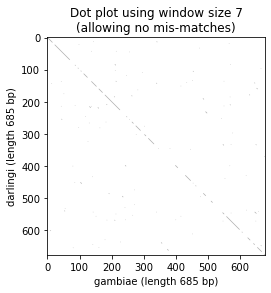

Dot plot showing gambiae COX2 compared to arabiensis COX2 sequence:


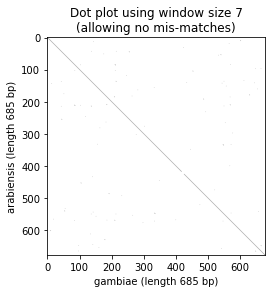

In [85]:
# The dot plot above doesn't work very well with long sequences so I am creating another plot below.
# Starting by opening the fasta file that contains the COX2 sequence data for all three species.
# Then reading in each sequence to a different object (rec_one, rec_two, rec_three)
with open("cox2_anopheles.fasta") as in_handle:
    record_iterator = SeqIO.parse(in_handle, "fasta")
    # rec_one is the gambiae sequence
    rec_one = next(record_iterator)
    # rec_two is the darlingi sequence
    rec_two = next(record_iterator)
    # rec_three is the arabiensis sequence
    rec_three = next(record_iterator)
        
window = 7
seq_one = str(rec_one.seq).upper()
seq_two = str(rec_two.seq).upper()
seq_three = str(rec_three.seq).upper()
data = [
    [
        (seq_one[i : i + window] != seq_two[j : j + window])
        for j in range(len(seq_one) - window)
    ]
    for i in range(len(seq_two) - window)
]

# Plotting the dot plot for gambiae compared to darlingi
print("Dot plot showing gambiae COX2 compared to darlingi COX2 sequence:")
pylab.gray()
pylab.imshow(data)
pylab.xlabel("%s (length %i bp)" % (rec_one.id, len(rec_one)))
pylab.ylabel("%s (length %i bp)" % (rec_two.id, len(rec_two)))
pylab.title("Dot plot using window size %i\n(allowing no mis-matches)" % window)
pylab.show()


# Now making the dot plot for gambiae compared to arabiensis
data = [
    [
        (seq_one[i : i + window] != seq_three[j : j + window])
        for j in range(len(seq_one) - window)
    ]
    for i in range(len(seq_three) - window)
]

print("Dot plot showing gambiae COX2 compared to arabiensis COX2 sequence:")
pylab.gray()
pylab.imshow(data)
pylab.xlabel("%s (length %i bp)" % (rec_one.id, len(rec_one)))
pylab.ylabel("%s (length %i bp)" % (rec_three.id, len(rec_three)))
pylab.title("Dot plot using window size %i\n(allowing no mis-matches)" % window)
pylab.show()

The code above I found and modified from: http://biopython.org/DIST/docs/tutorial/Tutorial.html